<a href="https://colab.research.google.com/github/jofmorenore/Modelos_Lineales/blob/main/Ridge_Lasso_MLG/Regresi%C3%B3n_Lasso_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#install.packages("car")
install.packages("glmnet")
install.packages("purrr")
library(glmnet)
#library(car)
library(purrr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: Matrix

Loaded glmnet 4.1-6



# **Ejemplo Ridge**
Ravishanker y Dey. Ejemplo 8.3

Los siguientes datos describen la cantidad de **mano de obra** necesaria para operar los alojamientos de oficiales de la Marina de Estados Unidos. Se presenta la información de 25 establecimientos. La varaible respuesta Y son las horas-hombre necesarias para operar un establecimiento. Las variables predictoras son:

**X1:** Ocupación diaria promedio \\
**X2:** Promedio mensual de check-ins \\
**X3:** Horas semanales de operación de la mesa de servicio \\
**X4:** Area de uso común operativa (en pies cuadrados) \\
**X5:** Número de alas del edificio \\
**X6:** Capacidad de atraque \\
**X7:** Número de habitaciones \\

In [ ]:
manhours <- read.csv("https://github.com/EddytheDowdy/Students_Anova/blob/main/manhours.csv?raw=true")
head(manhours)

,X,manhours,occupanc,checkins,svcdesk,common,wings,berthing,rooms
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,1,180.23,2.0,4.00,4.0,1.26,1,6,6
2,2,182.61,3.0,1.58,40.0,1.25,1,5,5
3,3,199.92,5.3,1.67,42.5,7.79,3,25,25
4,4,284.55,7.0,2.37,168.0,1.00,1,7,8
5,5,267.38,16.5,8.25,168.0,1.12,2,19,19
6,6,164.38,16.6,23.78,40.0,1.00,1,13,13


Se presentan los resultados de la estimación por mínimos cuadrados.

In [ ]:
fit = lm(manhours ~ occupanc + checkins + svcdesk + common + wings + berthing + rooms, data = manhours)
summary(fit)


Call:
lm(formula = manhours ~ occupanc + checkins + svcdesk + common + 
    wings + berthing + rooms, data = manhours)

Residuals:
    Min      1Q  Median      3Q     Max 
-869.74 -190.25  -41.22  182.50  826.18 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 148.2206   221.6269   0.669  0.51261    
occupanc     -1.2874     0.8057  -1.598  0.12851    
checkins      1.8096     0.5152   3.512  0.00267 ** 
svcdesk       0.5904     1.8001   0.328  0.74693    
common      -21.4817    10.2226  -2.101  0.05082 .  
wings         5.6194    14.7562   0.381  0.70806    
berthing    -14.5147     4.2262  -3.434  0.00316 ** 
rooms        29.3603     6.3704   4.609  0.00025 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 455.5 on 17 degrees of freedom
Multiple R-squared:  0.9612,	Adjusted R-squared:  0.9452 
F-statistic: 60.17 on 7 and 17 DF,  p-value: 9.313e-11


Se evalúa multicolinealidad utilizando el factor de inflación de la varianza.

In [ ]:
vif(fit)

occupanc  checkins   svcdesk    common     wings  berthing     rooms 
 2.165539  4.500146  1.405882  2.352975  3.653326 37.184830 63.712775

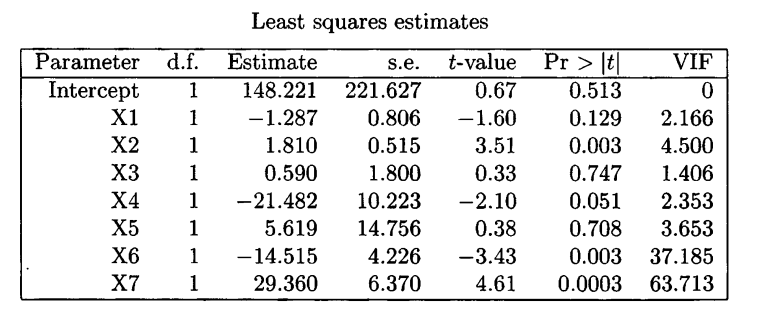

**¡No queremos simplemente eliminar las covariables más significativas!**

Se presentan los resultados de **regresión Ridge** utilizando la función glmnet. Por defecto, la función prueba con 100 valores distintos para lambda y calcula estimados para todos.

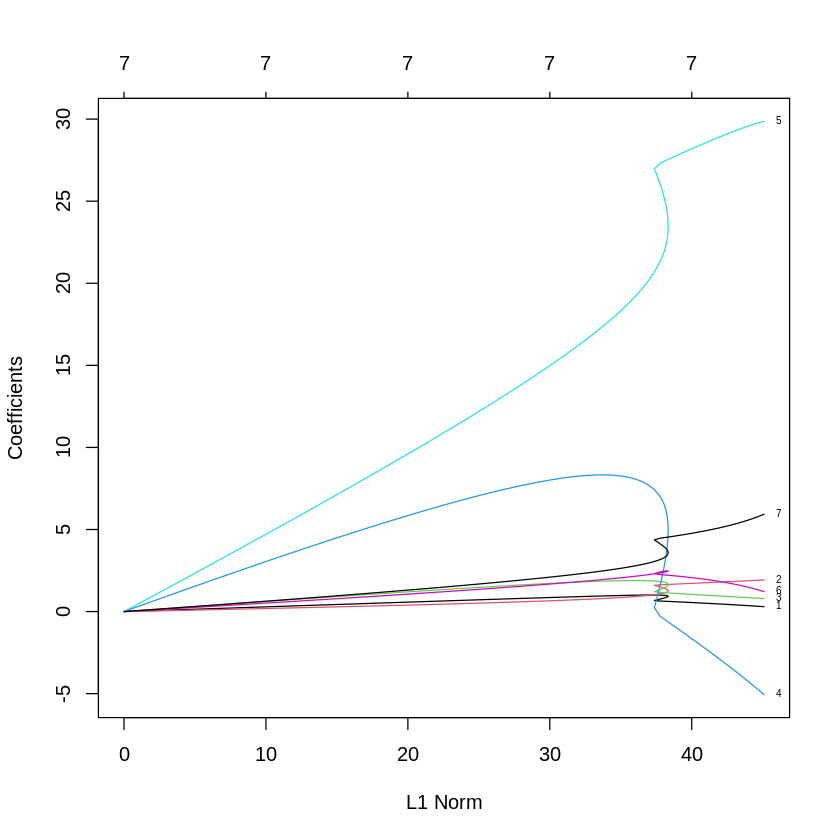

In [ ]:
X = as.matrix(manhours[,c(-1,-2)])
fitR = glmnet(x = X, y = manhours$manhours ,alpha = 0)
plot(fitR, label = T)

In [ ]:
print(fitR)


Call:  glmnet(x = X, y = manhours$manhours, alpha = 0) 

    Df  %Dev  Lambda
1    7  0.00 1798000
2    7  0.93 1639000
3    7  1.02 1493000
4    7  1.12 1360000
5    7  1.23 1240000
6    7  1.35 1130000
7    7  1.48 1029000
8    7  1.62  937700
9    7  1.77  854400
10   7  1.94  778500
11   7  2.13  709400
12   7  2.33  646300
13   7  2.55  588900
14   7  2.80  536600
15   7  3.06  488900
16   7  3.35  445500
17   7  3.67  405900
18   7  4.01  369900
19   7  4.39  337000
20   7  4.80  307100
21   7  5.25  279800
22   7  5.73  254900
23   7  6.26  232300
24   7  6.84  211600
25   7  7.46  192800
26   7  8.14  175700
27   7  8.87  160100
28   7  9.66  145900
29   7 10.51  132900
30   7 11.44  121100
31   7 12.43  110400
32   7 13.50  100600
33   7 14.64   91620
34   7 15.87   83480
35   7 17.18   76060
36   7 18.57   69310
37   7 20.06   63150
38   7 21.64   57540
39   7 23.30   52430
40   7 25.06   47770
41   7 26.91   43530
42   7 28.84   39660
43   7 30.86   36140
44   7 32.95   329

Vale, pero ¿cuáles son los $\hat{\beta}$ ?

Con la función *coef* se obtienen para un lambda específico

In [ ]:
#@title Recuperar los betas { run: "auto" }
lambda <- 6.8 #@param {type:"slider", min:0, max:14, step:0.1}
coef(fitR, s= exp(lambda))

8 x 1 sparse Matrix of class "dgCMatrix"
                     s1
(Intercept) 203.2751412
occupanc      0.8672897
checkins      1.3716162
svcdesk       1.5165770
common        3.5509246
wings        24.6108928
berthing      2.4809016
rooms         3.8117009

**Entonces, ¿cómo escoger lamdba?**

El procedimiento más convencional es realizar un proceso de validación cruzada y verificar cuál minimiza el error cuadrático medio.



Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


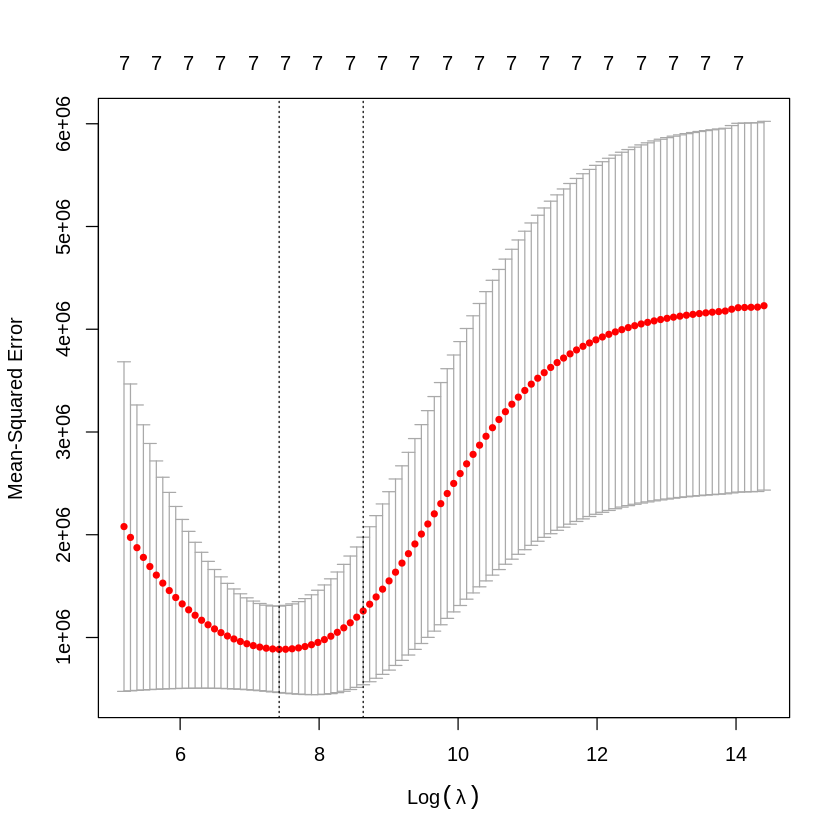

In [ ]:
cvfitR <- cv.glmnet(x = X, y = manhours$manhours ,alpha = 0)
plot(cvfitR)

In [ ]:
#El lambda que minimiza el error en la validación cruzada se guarda con el nombre de lambda.min
cvfitR$lambda.min

[1] 1677.285

In [ ]:
betaridge = coef(cvfitR, s = "lambda.min")
betaridge

8 x 1 sparse Matrix of class "dgCMatrix"
                    s1
(Intercept) 294.253044
occupanc      0.992220
checkins      1.128482
svcdesk       1.793310
common        6.541960
wings        21.915795
berthing      2.398308
rooms         3.278802

**¿Qué ganamos?** \\
Comparemos con el error cuadrático medio de Mínimos cuadrados ordinarios

In [ ]:
#Se toma el 80% de los datos para estimar los parámetros de Mínimos Cuadrados Ordinarios. Con ellos, se intenta predecir los valores del 20% restante.

size = 0.80
sample = sample(c(1:nrow(manhours)),nrow(manhours)*size)
training = manhours[sample,]
fittrain = lm(manhours ~ occupanc + checkins + svcdesk + common + wings + berthing + rooms, data = training)

nsample = setdiff( c(1:nrow(manhours)), sample)
test = manhours[nsample,]

yhatols = predict(fittrain, newdata = test)
MSEOLS = mean((test$manhours - yhatols)^2)

Xr = as.matrix(cbind(rep(1, nrow(X)), X))
yhatridge = Xr %*% as.matrix(betaridge)
MSERidge = mean((manhours$manhours- yhatridge)^2)

#Cada vez que se ejecuta esta celda, se toma una muestra distinta de 80%. En cada caso el MSE de OLS es mayor que el de Ridge
c(MSEOLS, MSERidge)

[1] 2665333.5  463813.2

#Pero Ridge tiene un punto débil...

Supongamos que el peso de niños menores de 5 años se modelar como

\\

$$Peso_i = \beta_0 +\beta_1Estatura_i + \beta_2Edad_i + \varepsilon_i$$ 
$$\varepsilon \sim N(0, \sigma^2I)$$

\\

Se tienen los datos de estatura, edad y día del mes en que nació.

In [ ]:
#Se definen valores arbitrarios
n = 20
sd = 4

b0 = 10
b1 = 1.5
b2 = 2

estatura = rpois(n,6)
edad = runif(n, 0, 5)
dia = rdunif(n, 1, 31)
er = rnorm(n, mean = 0, sd = sd)

#Nótese que el peso no es función del día del mes.
peso = b0 + b1*estatura + b2*edad + er

Xpeso = cbind(estatura, edad, dia)
fitpeso <- cv.glmnet(x = Xpeso, y = peso ,alpha = 0)
betapeso = coef(fitpeso, s = fitpeso$lambda.min)
betapeso


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


4 x 1 sparse Matrix of class "dgCMatrix"
                     s1
(Intercept) 23.59027106
estatura     0.32506484
edad         0.17285677
dia         -0.07139648

¿Qué hacer con los $\beta$ cercanos a cero?
¿Cuál puede ser un criterio de eliminación de variables?

#Entra LASSO

Mientras en Ridge se buscaba minimizar la expresión
$$ (y - X\beta)'(y - X\beta) + \lambda ∑_{j=1}^p (\beta_j)^2$$
En Lasso, el término de la penalización aparece con valor absoluto
$$ (y - X\beta)'(y - X\beta) + \lambda ∑_{j=1}^p |\beta_j|$$

\\

No existe una forma cerrada general para $\hat{\beta}_{Lasso}$. Se puede considerar solamente el caso especial en el que la matriz $X$ es ortogonal, es decir $X'X = I_p$. En este caso, se puede expandir esta expresión como
$$ Y'Y + β'X'Xβ - 2Y'Xβ + λ||\beta||_1 = Y'Y + ∑_{j=1}^p (β_j^2 - 2Y'X_jβ_j + λ|β_j|)$$

Donde $X_j$ es la $j$-ésima columna de la matriz $X$. Para encontrar el mínimo, se puede dividir el problema en tres casos.

\\

**Caso 1** $β_j > 0$
$$ \begin{align}
2\hat{\beta}_j - 2Y'X_j + λ &= 0 \\
\hat{\beta}_j &= Y'X_j - λ/2
\end{align} $$

**Caso 2** $β_j < 0$
$$ \begin{align}
2\hat{\beta}_j - 2Y'X_j - λ &= 0 \\
\hat{\beta}_j &= Y'X_j + λ/2
\end{align} $$

**Caso 3** $β_j = 0$

\\

Sea $\hat{\beta}_j^0$ el estimador de Mínimos Cuadrados Ordinarios. Para este caso especial, se puede mostrar que $\hat{\beta}_j^0 = Y'X_j$. Por lo tanto, el estimador de Lasso se podría escribir en términos del estimador de MCO como
$$
\hat{\beta}_j = \begin{cases}
\hat{\beta}_j^0 + λ/2, & \text{ si } \hat{\beta}_j = \hat{\beta}_j^0 + λ/2 < 0 \\
\hat{\beta}_j^0 - λ/2, & \text{ si } \hat{\beta}_j = \hat{\beta}_j^0 - λ/2 > 0 \\
0, & \text{en otro caso}
\end{cases}
$$

\\

A diferencia del estimador de Ridge, no hay una expresión explícita para el sesgo y la varianza del estimador de Lasso. Sin embargo, se puede mostrar que a medida que aumenta la penalización, aumenta el sesgo y disminuye la varianza.

Vamos a tomar un conjunto arbitrario de puntos


Call:
lm(formula = x1 ~ x2)

Coefficients:
(Intercept)           x2  
    -0.6619       1.1725  


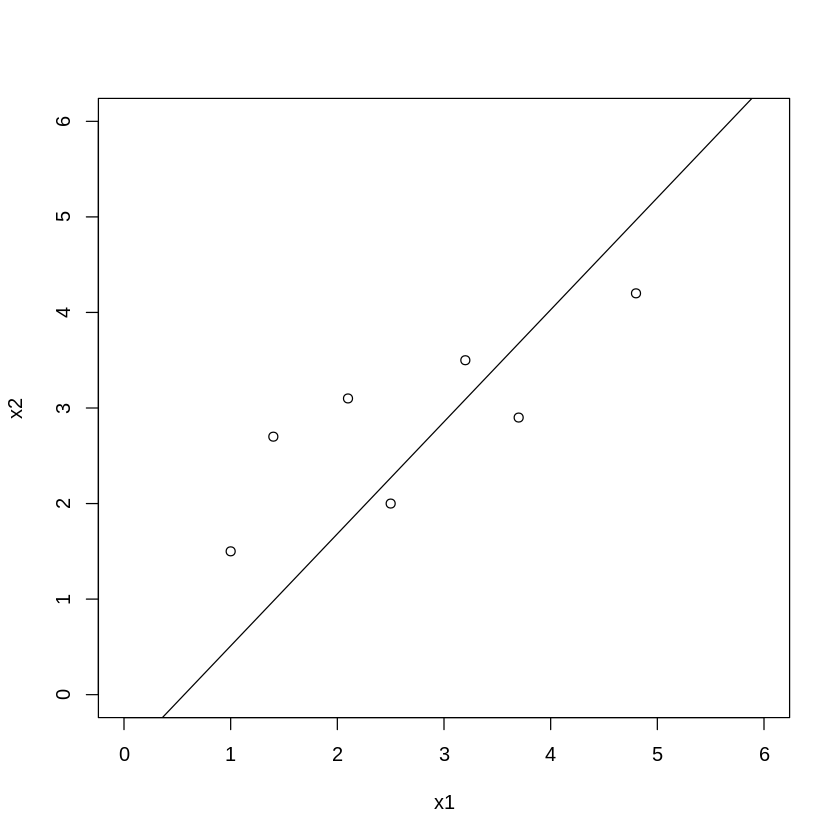

In [ ]:
x1=c(1,2.5,3,4.3,1.7,3.7,4.8,2.1,3.2,1.4)[-c(3:5)]
x2=c(1.5,2,4.5,5.2,3.8,2.9,4.2,3.1,3.5,2.7)[-c(3:5)]
regr=lm(x1~x2)
plot(x1,x2,xlim=c(0,6),ylim=c(0,6))
abline(regr,xlim=c(0,6),ylim=c(0,6))
regr


A continuación se grafican valores para $\beta_1$ contra su error correspondiente. Sin ninguna penalización $λ$, el $argmin$ de esta función corresponde a $\hat{\beta}_{OLS}$

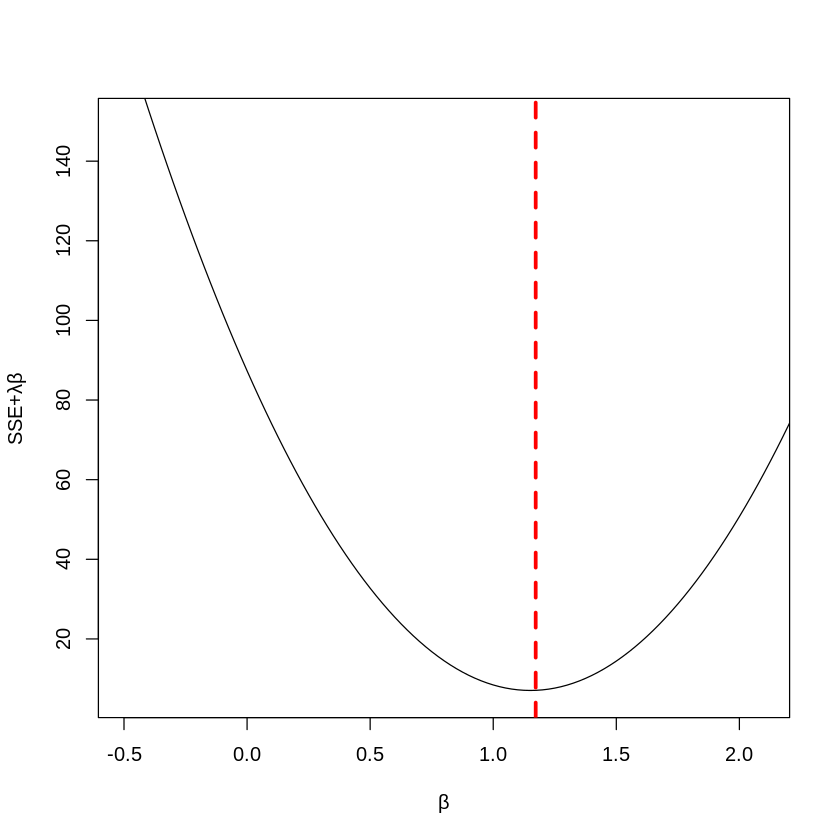

In [ ]:
SEC0=vector()
j=1
b1=-10
while(j<=1001){
  b1=b1+0.025
  i=1
  x2_calc=vector()
  while(i<=(length(x1))){
    xi=x1[i]
    x2_calc=append(x2_calc,regr$coefficients[1]+b1*xi)
    i=i+1
  }
  SEC0=append(SEC0,sum((x2-x2_calc)^2))
  j=j+1
}
#####
limitey=c(6,150)
plot(seq(-10,15,.025),SEC0,type="l",ylim=limitey,xlim=c(-.5,2.1),ylab="SSE+λβ",xlab="β")
abline(v=regr$coefficients[2],col="red",lwd=3,lty=2)


Se presenta una curva similar, pero aplicando distintos valores $λ$ de penalización *Lasso*. Nótese que, a diferencia de Mínimos Cuadrados Ordinarios o de penalización *Ridge* en donde el gráfico es una parábola, aquí el gráfico se trunca en cero. En *Lasso* el $argmin$ puede encontrarse exactamente en cero.

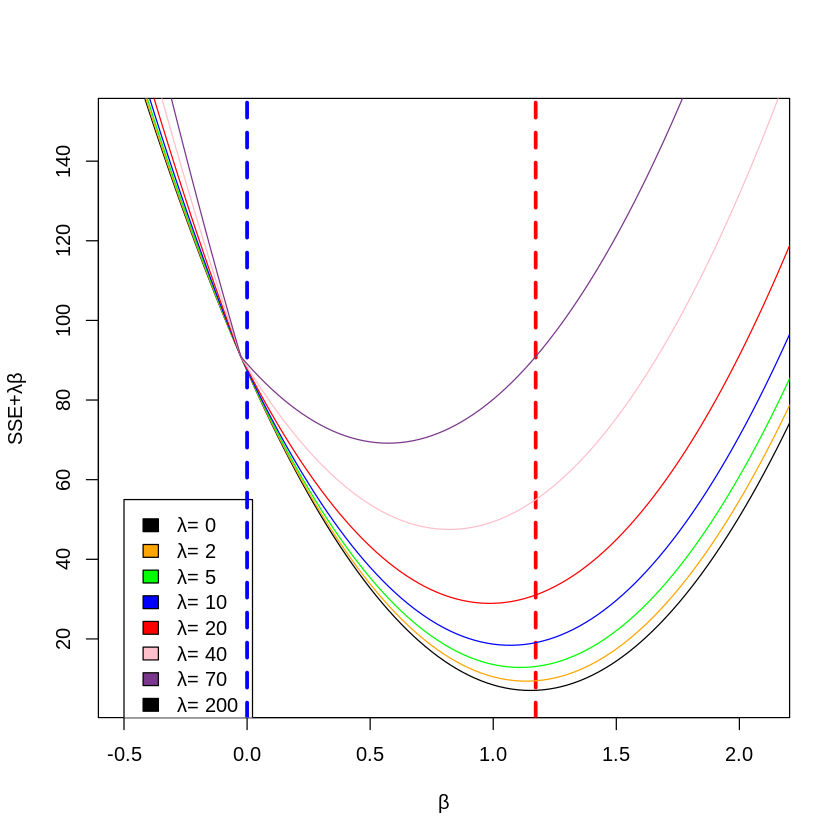

In [ ]:
limitey=c(6,150)
plot(seq(-10,15,.025),SEC0,type="l",ylim=limitey,xlim=c(-.5,2.1),ylab="SSE+λβ",xlab="β")
abline(v=regr$coefficients[2],col="red",lwd=3,lty=2)

colores=c("orange","green","blue","red","pink","mediumorchid4")
lambda=c(2,5,10,20,40,70)
k=1
while(k<=6){
  SEC=vector()
  j=1
  b1=-10
  while(j<=1001){
    b1=b1+0.025
    i=1
    x2_calc=vector()
    while(i<=(length(x1))){
      xi=x1[i]
      x2_calc=append(x2_calc,regr$coefficients[1]+b1*xi)
      i=i+1
    }
    SEC=append(SEC,sum((x2-x2_calc)^2)+lambda[k]*abs(b1)) ###JUGUEMOS ACÁ####
    j=j+1
  }
  lines(seq(-10,15,.025),SEC,col=colores[k])
  k=k+1
}
legend(-.5, 55, legend=paste("λ=",c(0,lambda)), fill = c("black",colores))
abline(v=0,col="blue",lwd=3,lty=2)

De forma similar a Ridge, se puede usar validación cruzada para encontrar el $λ$ que minimiza el error cuadrático medio.

In [ ]:
cvfitlasso = cv.glmnet(x = cbind(x1,rep(1,length(x1))), y = x2 ,alpha = 1,grouped = F)
cvfitlasso


Call:  cv.glmnet(x = cbind(x1, rep(1, length(x1))), y = x2, grouped = F,      alpha = 1) 

Measure: Mean-Squared Error 

     Lambda Index Measure      SE Nonzero
min 0.00436    55  0.4664 0.07456       1
1se 0.13631    18  0.5401 0.10921       1

Retomando el ejemplo presentado anteriormente, se tiene que la penalización Lasso sí puede determinar que la variable $dia$ no tiene un peso en la estimación de la variable $peso$ 

In [ ]:
n = 20
sd = 2

b0 = 10
b1 = 1.5
b2 = 2

estatura = rpois(n,6)
edad = runif(n, 0, 5)
dia = rdunif(n, 1, 31)
er = rnorm(n, mean = 0, sd = sd)

peso = b0 + b1*estatura + b2*edad + er

Xpeso = cbind(estatura, edad, dia)
fitpeso <- cv.glmnet(x = Xpeso, y = peso ,alpha = 1)
betapeso = coef(fitpeso, s = fitpeso$lambda.min)
betapeso


Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”


4 x 1 sparse Matrix of class "dgCMatrix"
                  s1
(Intercept) 9.388593
estatura    1.370722
edad        2.426871
dia         .       

A medida que aumenta $\lambda$, disminuyen (en valor absoluto) los valores de los parámetros asociados a las covariables y aumenta (en valor absoluto) el valor del parámetro asociado al intercepto.

In [ ]:
#@title  { run: "auto" }
lambda <- 10 #@param {type:"slider", min:0, max:30, step:1}

n = 20
sd = 4

b0 = 10
b1 = 15

estatura = rpois(n,6)
er = rnorm(n, mean = 0, sd = sd)
x2 = cbind(rep(1, n), estatura)

peso = b0 + b1*estatura + er

fitR = glmnet(x = x2, y = peso ,alpha = 1, lambda = lambda)
coef(fitR)

3 x 1 sparse Matrix of class "dgCMatrix"
                  s0
(Intercept) 26.73466
             .      
estatura    12.04038

##Para terminar
Una comparación gráfica de los estimadores OLS contra Ridge y Lasso

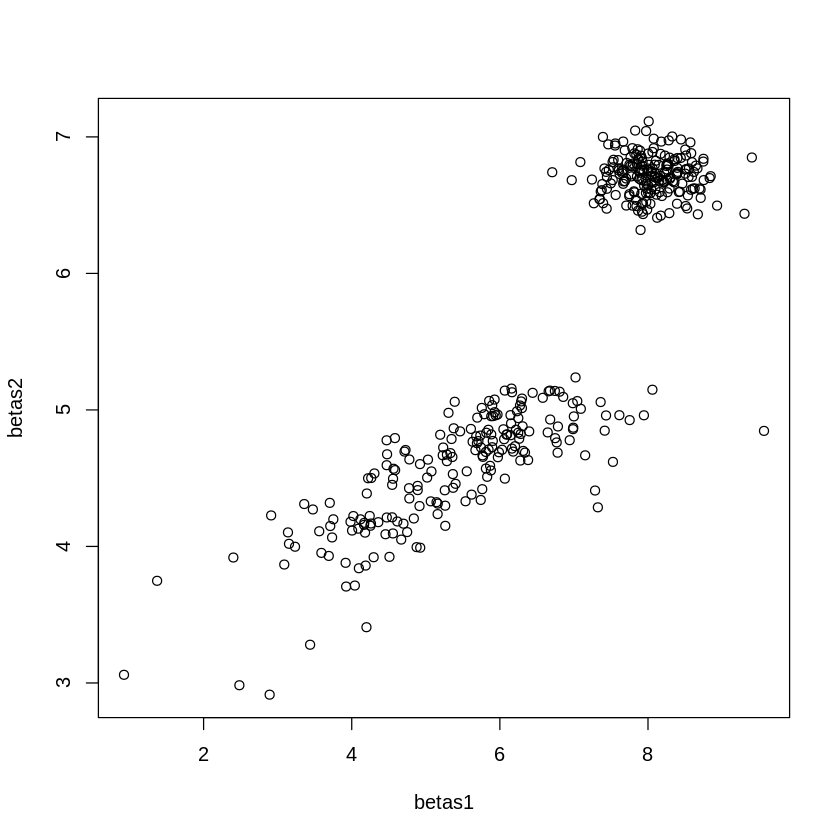

In [ ]:
b0  = 9
b1  = 8
b2  = 6.7
sd = 4
ridge = 0
lasso = 1

betas1 = 0
betas2 = 0
for (i in c(1:200)) {
  X1 = rpois(20, 6)
  X2 = rchisq(20, df = 15, ncp = 3)
  e  = rnorm(20, mean = 0 , sd = sd)
  Y  = (b0 + b1*X1 + b2*X2 + e)
  fit = lm(Y~X1+X2)
  betas1[i] = coefficients(fit)[2]
  betas2[i] = coefficients(fit)[3]
}

for (j in c(1:200)) {
  X1 = rpois(20, 6)
  X2 = rchisq(20, df = 15, ncp = 3)
  e  = rnorm(20, mean = 0 , sd = sd)
  Y  = (b0 + b1*X1 + b2*X2 + e)
  X  = cbind(X1, X2) 
  fit = glmnet(x = X, y = Y ,alpha = 0, lambda = 20) #Alterna entre Ridge(alpha = 0) y Lasso (alpha = 1)
  betas1[i+j] = coef(fit)[2]
  betas2[i+j] = coef(fit)[3]
}

plot(betas1, betas2)